# 📈 Practical 3
### Perform Time Series Analysis on Data
Dataset: [Pharmaceutical Drug Sales](https://raw.githubusercontent.com/selva86/datasets/master/a10.csv)

In [4]:
!pip install pandas
!pip install matplotlib seaborn statsmodels

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 2.0 MB/s eta 0:00:04
   ----- ---------------------------------- 1.0/8.1 MB 1.7 MB/s eta 0:00:05
   ------ --------------------------------- 1.3/8.1 MB 1.8 MB/s eta 0:00:04
   ------- -------------------------------- 1.6/8.1 MB 1.6 MB/s eta 0:00:05
   --------- ------------------------------ 1.8/8.1 MB 1.5 MB/s eta 0:00:05
   ---------- ----------------------------- 2.1/8.1 MB 1.4 MB/s eta 0:00:05
   ----------- ---------------------------- 2.4/8.1 MB 1.5 MB/s eta 0:00:04
   -------------- ------------------------- 2.9/8.1 MB 1.5 MB/s eta 0:00:04
   ---------------- ----------------------- 3.4/8.1 MB 1.6 MB/s eta 0:00:03
   ------------------- -------------------- 3.9/8.1 MB 1.7 MB/s eta 0:00:03
   ----------------------- ---------------- 4.7/8.1 MB 1.9 MB/s eta 0:00:02
   -----------------------

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns


### a. Import time series data

In [6]:
url = 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'
df = pd.read_csv(url, parse_dates=['date'], index_col='date')
df.head()


,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


### b. Visualizing the time series

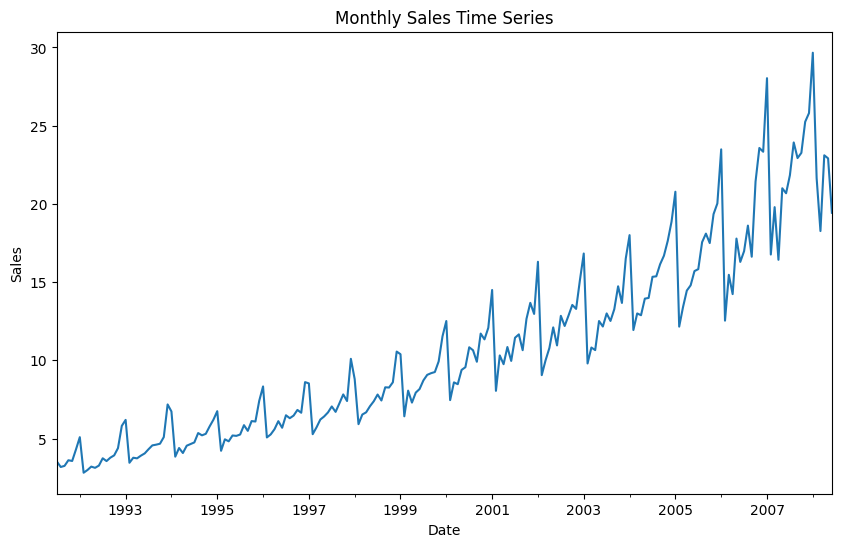

In [7]:
df['value'].plot(title='Monthly Sales Time Series', figsize=(10,6))
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


### c. Seasonal plot

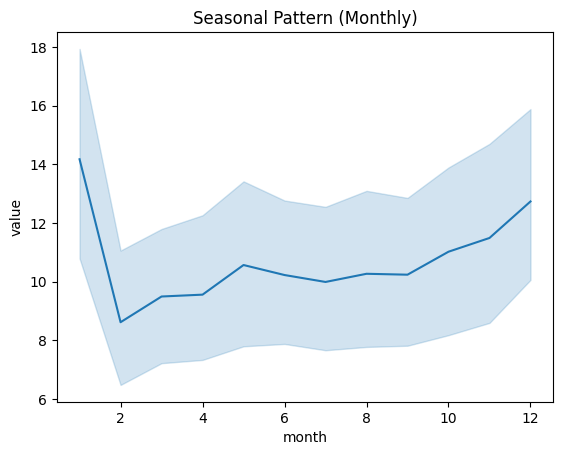

In [8]:
df['month'] = df.index.month
sns.lineplot(data=df, x='month', y='value')
plt.title("Seasonal Pattern (Monthly)")
plt.show()


### d. Boxplot: Month-wise & Year-wise distribution

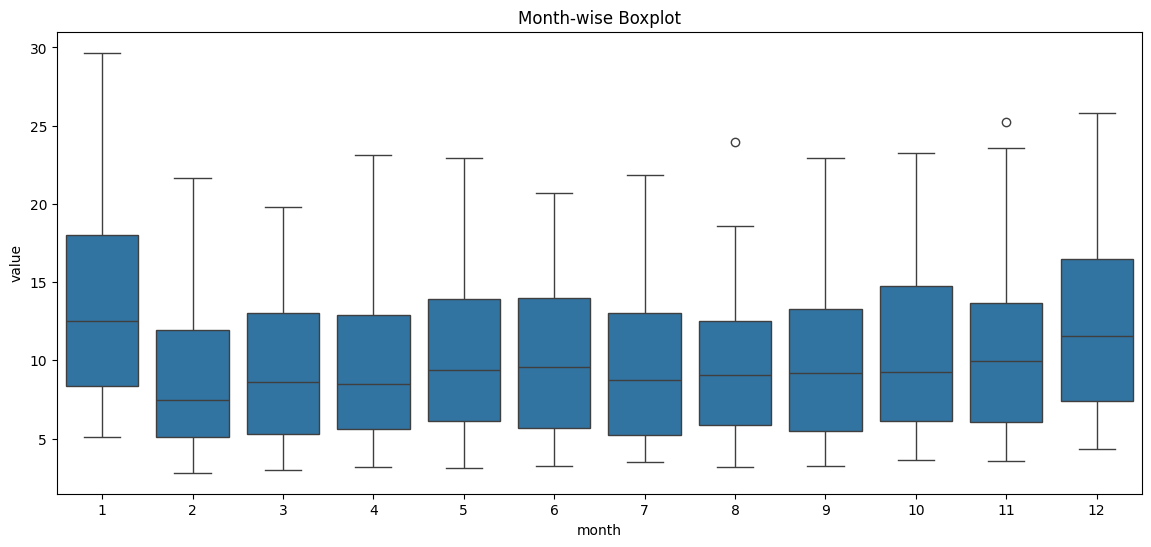

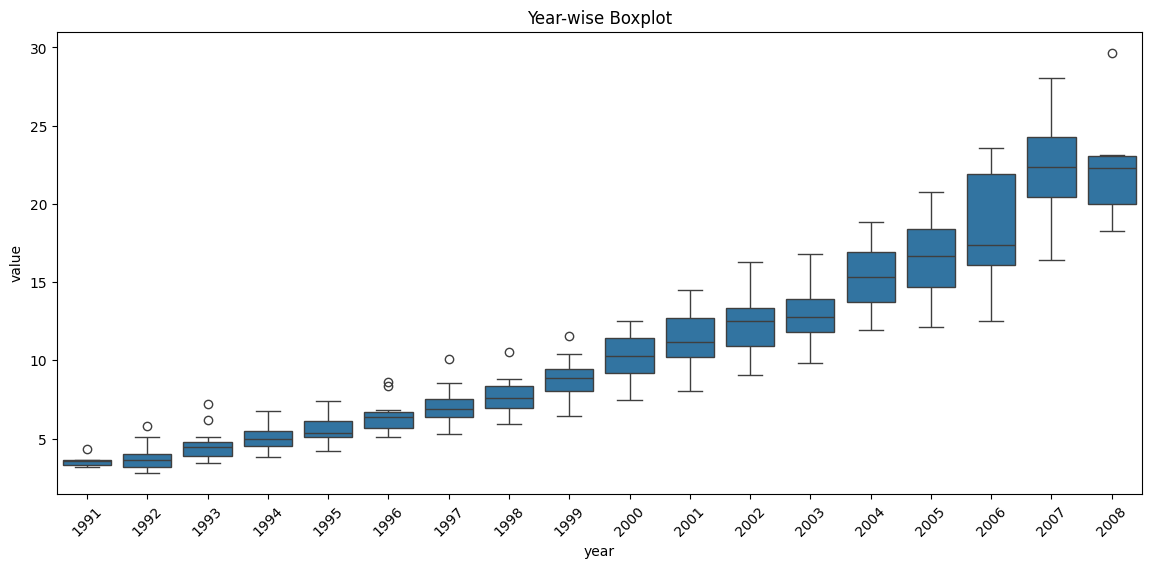

In [9]:
df['year'] = df.index.year
plt.figure(figsize=(14,6))
sns.boxplot(x='month', y='value', data=df)
plt.title("Month-wise Boxplot")
plt.show()

plt.figure(figsize=(14,6))
sns.boxplot(x='year', y='value', data=df)
plt.title("Year-wise Boxplot")
plt.xticks(rotation=45)
plt.show()


In [ ]:
e. Patterns in the Time Series

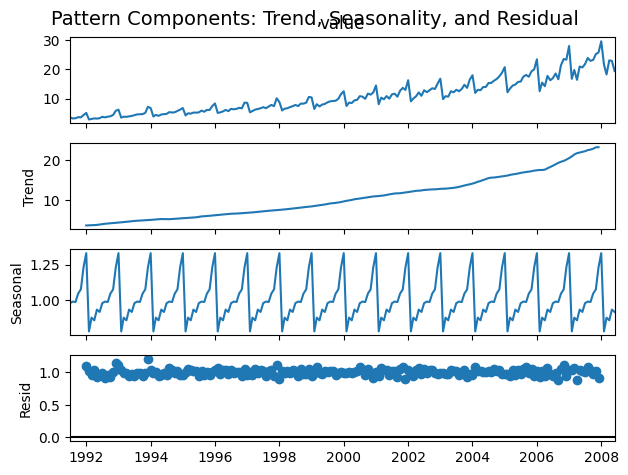

In [13]:

# Plot all components from seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['value'], model='multiplicative')
result.plot()
plt.suptitle("Pattern Components: Trend, Seasonality, and Residual", fontsize=14)
plt.show()


### f. Additive and Multiplicative Decomposition

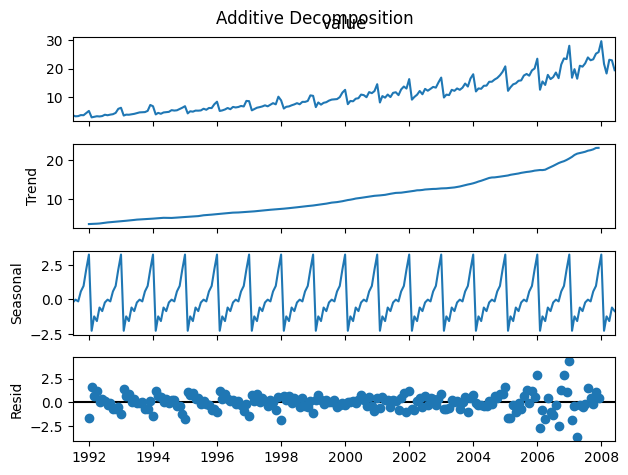

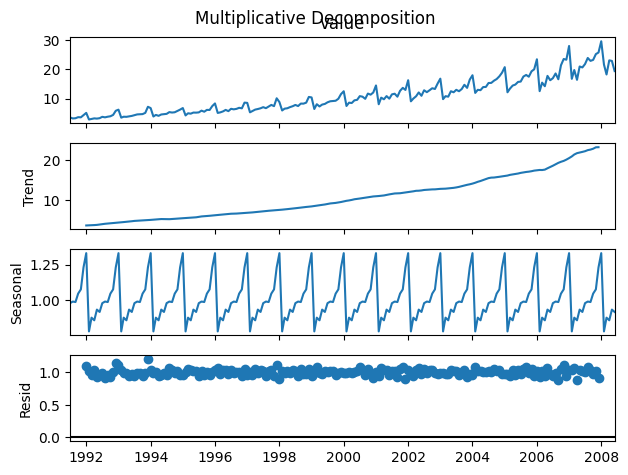

In [10]:
result_add = seasonal_decompose(df['value'], model='additive')
result_add.plot()
plt.suptitle("Additive Decomposition")
plt.show()

result_mul = seasonal_decompose(df['value'], model='multiplicative')
result_mul.plot()
plt.suptitle("Multiplicative Decomposition")
plt.show()


In [ ]:
g. Identify Stationarity (ADF Test)

In [14]:

from statsmodels.tsa.stattools import adfuller

result = adfuller(df['value'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] < 0.05:
    print("✅ The series is likely stationary.")
else:
    print("❌ The series is likely non-stationary.")


ADF Statistic: 3.14518568930675
p-value: 1.0
Critical Values: {'1%': np.float64(-3.465620397124192), '5%': np.float64(-2.8770397560752436), '10%': np.float64(-2.5750324547306476)}
❌ The series is likely non-stationary.


In [ ]:
h. Make Non-Stationary Series Stationary (Differencing)

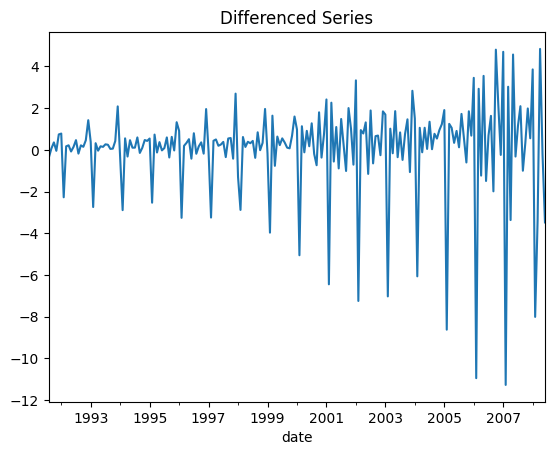

ADF Statistic (Differenced): -2.495172147449788
p-value: 0.11665341686467584


In [15]:

df['value_diff'] = df['value'] - df['value'].shift(1)
df['value_diff'].dropna().plot(title='Differenced Series')
plt.show()

# Test again
result_diff = adfuller(df['value_diff'].dropna())
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value:', result_diff[1])


In [ ]:
 i. Detrend a Time Series

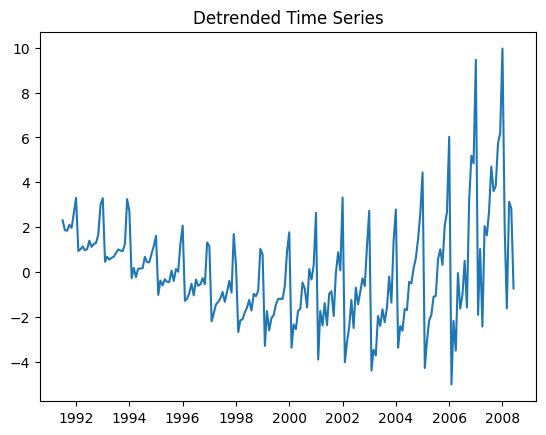

In [16]:

from scipy.signal import detrend

df['detrended'] = detrend(df['value'].values)
plt.plot(df.index, df['detrended'])
plt.title("Detrended Time Series")
plt.show()

In [ ]:
j. Deseasonalize a Time Series

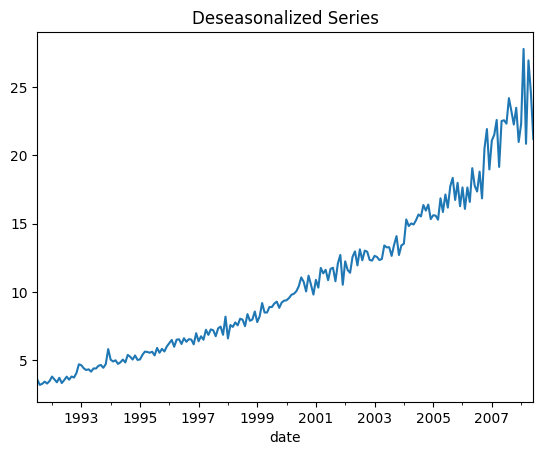

In [17]:

# Remove seasonal component from multiplicative model
seasonal = result_mul.seasonal
deseasonalized = df['value'] / seasonal
deseasonalized.plot(title="Deseasonalized Series")
plt.show()

In [ ]:
k. Test for Seasonality (Autocorrelation Plot)

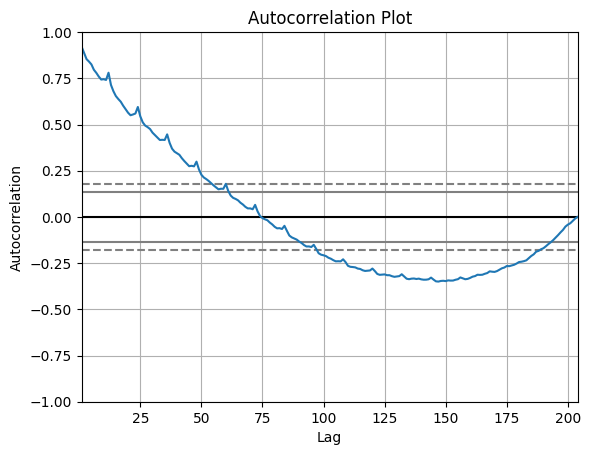

In [18]:

from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['value'])
plt.title("Autocorrelation Plot")
plt.show()

In [ ]:
l. Test for Seasonality

In [21]:
import numpy as np
seasonal_var = np.var(result_add.seasonal.dropna())
total_var = np.var(df['value'])
seasonality_strength = seasonal_var / total_var

print(f"Strength of seasonality: {seasonality_strength:.2f}")

Strength of seasonality: 0.06
